---

Working code is in gnn_spektral

---

In [24]:
# Import necessary libraries

import graphcalc as gc
import spektral as sp
import random
import networkx as nx
import numpy as np

In [ ]:
# Function to generate random graphs and calculate their independence number.
def generate_domination_number_data(num_graphs, max_nodes):
    graphs = []
    domination_numbers = []
    for _ in range(num_graphs):
        num_nodes = random.randint(10, max_nodes)
        G = nx.gnp_random_graph(num_nodes, np.random.rand())
        dom_num = gc.domination_number(G)
        
        graphs.append(G)
        domination_numbers.append(dom_num)
    return graphs, domination_numbers

In [44]:
import pickle

is_first_time = True
num_graphs = 2_000
max_nodes = 64

if is_first_time:
    # Generate dataset of 2,000 random graphs with varying node sizes 10 <= n <= 64.
    graphs, domination_numbers = generate_domination_number_data(num_graphs, max_nodes)

    # Store the domination numbers and graphs in a text file.
    with open('C:\\Users\\kylej\\OneDrive\\Documents\\Schoolwork\\Research\\graph-neural-networks\\data\\domination_numbers.txt', 'w') as f:
        for dom_num in domination_numbers:
            f.write(f"{dom_num}\n")

    with open('C:\\Users\\kylej\\OneDrive\\Documents\\Schoolwork\\Research\\graph-neural-networks\\data\\graphs.pickle', 'wb') as f:
        pickle.dump(graphs, f)

In [45]:
# Load the domination numbers and graphs from the text file.
with open('C:\\Users\\kylej\\OneDrive\\Documents\\Schoolwork\\Research\\graph-neural-networks\\data\\domination_numbers.txt', 'r') as f:
    domination_numbers = [int(line.strip()) for line in f.readlines()]

with open('C:\\Users\\kylej\\OneDrive\\Documents\\Schoolwork\\Research\\graph-neural-networks\\data\\graphs.pickle', 'rb') as f:
    graphs = pickle.load(f)

3

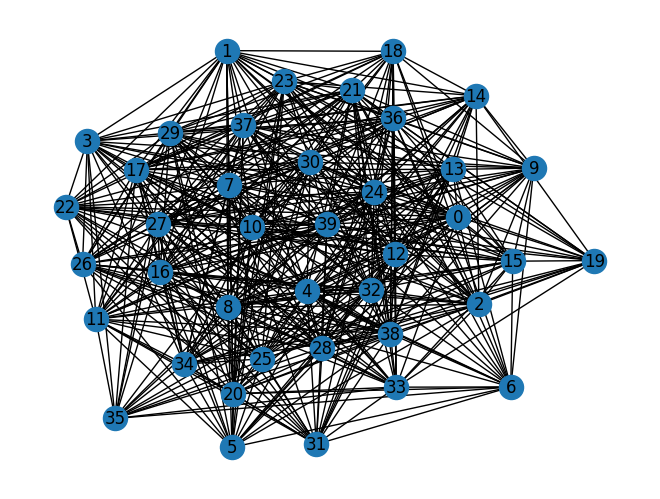

In [47]:
# Print a graph to see its structure
graph_idx = 0
nx.draw(graphs[graph_idx], with_labels=True)
domination_numbers[graph_idx]

In [ ]:
from spektral.data import Dataset, Graph

class GraphDataset(Dataset):
    """
    A dataset of num_graphs random graphs.
    """
    def __init__(self, nodes, **kwargs):
        self.nodes = nodes

        super().__init__(**kwargs)

    def read(self):
        # We must return a list of Graph objects
        output = []

        for i in range(num_graphs):
            data = np.load(os.path.join(self.path, f'graph_{i}.npz'))
            output.append(
                Graph(x=data['x'], a=data['a'], y=data['y'])
            )

        return output

# Split the test and training data.
assert len(graphs) == len(domination_numbers), "Graphs and independence numbers must have the same length."
split_index = int(0.8 * len(graphs))
for i in range(len(domination_numbers)):
    domination_numbers[i] = sp.data.Graph(a = nx.to_numpy_array(graphs[i]))
x_train = sp.data.Dataset(graphs[0:split_index])
y_train = domination_numbers[0:split_index]
x_test = sp.data.Dataset(graphs[split_index:])
y_test = domination_numbers[split_index:]

NotImplementedError: 

In [70]:
# Create our GNN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from spektral.layers import GCNConv, GlobalSumPool

class GNN(Model):

    def __init__(self, n_hidden, n_labels):
        super().__init__()
        self.graph_conv = GCNConv(n_hidden)
        self.pool = GlobalSumPool()
        self.dropout = Dropout(0)
        self.dense = Dense(n_labels, 'softmax')

    def call(self, inputs):
        out = self.graph_conv(inputs)
        out = self.dropout(out)
        out = self.pool(out)
        out = self.dense(out)

        return out

In [71]:
gnn = GNN(n_hidden=64, n_labels=64)
gnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
from spektral.data import BatchLoader

loader = BatchLoader(x_test, batch_size=32, epochs=10)

AttributeError: 'list' object has no attribute 'signature'

In [ ]:
gnn.fit(loader.load(), steps_per_epoch=loader.steps_per_epoch, epochs=10)